In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
print(torch.cuda.is_available())
import os
#import slider
from matplotlib.widgets import Slider
%cd

True
C:\Users\20183172


In [3]:
%cd Documents
%cd 2024-II
%cd prep 
%cd OilExpulsionData
%cd data
%cd snoevsen_preprocessed
# display all files in the folder
dir = os.listdir()
dir

C:\Users\20183172\Documents
C:\Users\20183172\Documents\2024-II
C:\Users\20183172\Documents\2024-II\prep
C:\Users\20183172\Documents\2024-II\prep\OilExpulsionData
C:\Users\20183172\Documents\2024-II\prep\OilExpulsionData\data
C:\Users\20183172\Documents\2024-II\prep\OilExpulsionData\data\snoevsen_preprocessed


c:\Users\20183172\AppData\Local\anaconda3\envs\grad\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


['conditioning.npy',
 'snapshots.npy',
 'snapshots.yaml',
 'snapshots_split0.npy',
 'snapshots_split1.npy',
 'snapshots_split2.npy',
 'snapshots_split3.npy',
 'snapshots_split4.npy',
 'spatial_conditioning.npy',
 'split_test_on_78.yaml']

In [4]:
# Open the large .npy file in memmap mode
file_path = "snapshots.npy"
data = np.load(file_path, mmap_mode='r')
print(data.shape)
firstdim = data.shape[0]
partitions = 5
splitsize = firstdim//partitions
print(splitsize)
for i in range(partitions):
    if i < partitions-1:
        chunk = data[(i)*splitsize:(i+1)*splitsize]
    else:
        chunk = data[i*splitsize:]
    
    #np.save("snapshots_split"+str(i)+".npy", chunk)
    print(chunk.shape)



(921, 8, 501, 96, 64)
184
(184, 8, 501, 96, 64)
(184, 8, 501, 96, 64)
(184, 8, 501, 96, 64)
(184, 8, 501, 96, 64)
(185, 8, 501, 96, 64)


C:\Users\20183172\AppData\Local\Temp\ipykernel_9228\191537780.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


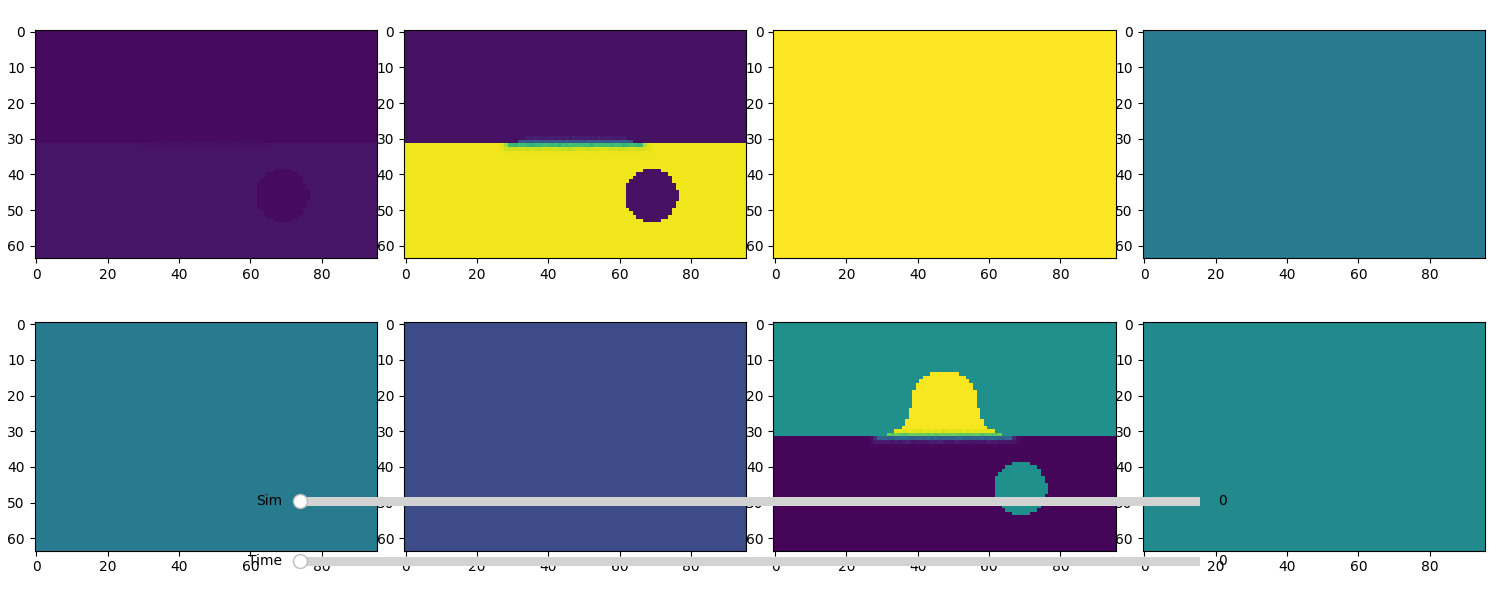

In [25]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Load data
data = np.load("snapshots.npy", mmap_mode='r')

# Initial parameters
time_dim = 0
pde_dim = 0
first_dim = 0

vmins = data[0, :, :, :, :].min(axis=(1,2,3))
vmaxs = data[0, :, :, :, :].max(axis=(1,2,3))

# Create the figure and axes
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
ax = ax.flatten()

# Initial plot with individual color scaling
images = []
for i in range(8):
    img = ax[i].imshow(
        data[first_dim, i, time_dim, :, :].T,
        #aspect='auto',
        vmin=vmins[i],  # Individual scaling
        vmax=vmaxs[i],  # Individual scaling
    )
    images.append(img)

# Adjust layout to make space for sliders
plt.subplots_adjust(bottom=0.3)

# Create slider axes
slider_ax = plt.axes([0.2, 0.05, 0.6, 0.03])  
slider2_ax = plt.axes([0.2, 0.15, 0.6, 0.03])  

# Sliders
time_slider = Slider(slider_ax, 'Time', 0, data.shape[2] - 1, valinit=time_dim, valstep=1)
first_slider = Slider(slider2_ax, 'Sim', 0, data.shape[0] - 1, valinit=first_dim, valstep=1)

# Update function
def update(val):
    time_dim = int(time_slider.val)
    first_dim = int(first_slider.val)
    for i in range(8):
        images[i].set_data(data[first_dim, i, time_dim, :, :].T)
    fig.canvas.draw_idle()

# Connect the sliders to the update function
time_slider.on_changed(update)
first_slider.on_changed(update)

plt.tight_layout()
plt.show()


array([ 73.06  ,   2.047 ,   0.    ,   0.2302,   0.2302, 107.7   ,
         1.018 , 118.75  ], dtype=float16)